In [11]:
#Import Turing, Distributions, LinearAlgebra and DataFrames
using Turing, Distributions

# Import MCMCChain, Plots, StatsPlots, GraphPlot, GraphRecipes, PyCall and Statistics for visualizations and diagnostics.
using MCMCChains, Plots, StatsPlots

# Set a seed for reproducibility.
using Random
Random.seed!(12);

# Turn off progress monitor.
Turing.turnprogress(false)

┌ Info: [Turing]: global PROGRESS is set as false
└ @ Turing /home/saumya/.julia/packages/Turing/RZOZ8/src/Turing.jl:24


false

In [3]:
N = 500
s = zeros(N)
for i=2:N
    s[i] = s[i - 1]*0.95 + rand(Normal(0, 1))
end

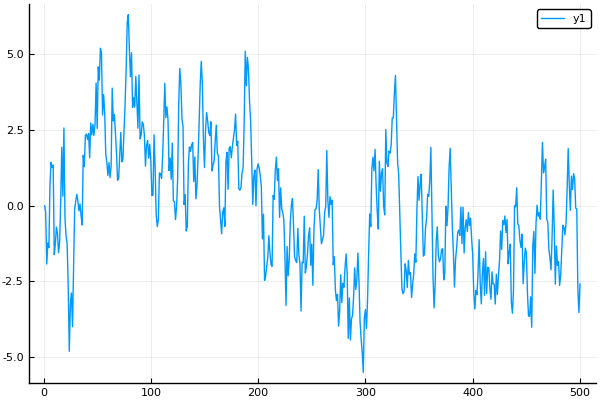

In [4]:
pyplot()
plot(s)

In [21]:
σ = 10
@model AR1(x, N) = begin
    α ~ Normal(0,σ) 
    β ~ Uniform(-1, 1)
    for t in 2:N
        μ = α + β * x[t-1] 
        x[t] ~ Normal(μ, 0.1) 
    end
end;

In [24]:
# This is temporary while the reverse differentiation backend is being improved.
Turing.setadbackend(:forward_diff)

# Sample using HMC
chain = sample(AR1(s, N), NUTS(1000, 200, 0.65) )

┌ Info: [Turing] looking for good initial eps...
└ @ Turing.Inference /home/saumya/.julia/packages/Turing/RZOZ8/src/inference/support/hmc_core.jl:247
┌ Info: [Turing] found initial ϵ: 0.008995330333709719
└ @ Turing.Inference /home/saumya/.julia/packages/Turing/RZOZ8/src/inference/support/hmc_core.jl:239
┌ Info:  Adapted ϵ = 0.007242623767691386, std = [1.0, 1.0]; 200 iterations is used for adaption.
└ @ Turing.Inference /home/saumya/.julia/packages/Turing/RZOZ8/src/inference/adapt/adapt.jl:90


[NUTS] Finished with
  Running time        = 16.07547771499999;
  #lf / sample        = 0.0;
  #evals / sample     = 0.001;
  pre-cond. metric    = [1.0, 1.0].


Object of type Chains, with data of type 1000×8×1 Array{Union{Missing, Float64},3}

Log evidence      = 0.0
Iterations        = 1:1000
Thinning interval = 1
Chains            = 1
Samples per chain = 1000
internals         = elapsed, epsilon, eval_num, lf_eps, lf_num, lp
parameters        = α, β

2-element Array{ChainDataFrame,1}

Summary Statistics
. Omitted printing of 2 columns
│ Row │ parameters │ mean       │ std       │ naive_se    │ mcse        │
│     │ Symbol     │ Float64    │ Float64   │ Float64     │ Float64     │
├─────┼────────────┼────────────┼───────────┼─────────────┼─────────────┤
│ 1   │ α          │ -0.0099547 │ 0.127027  │ 0.00401694  │ 0.00316059  │
│ 2   │ β          │ 0.889922   │ 0.0136734 │ 0.000432392 │ 0.000871367 │

Quantiles
. Omitted printing of 1 columns
│ Row │ parameters │ 2.5%       │ 25.0%       │ 50.0%       │ 75.0%       │
│     │ Symbol     │ Float64    │ Float64     │ Float64     │ Float64     │
├─────┼────────────┼────────────┼─────────────┼─────

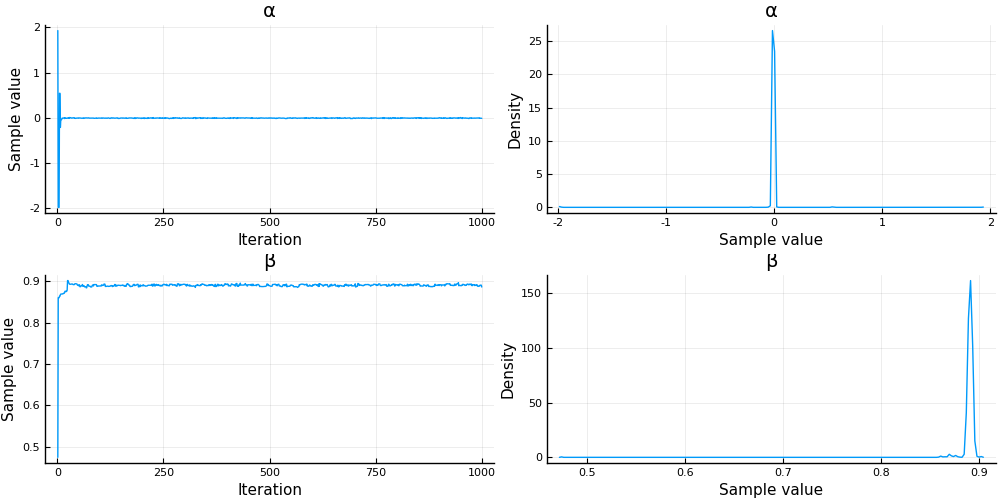

In [26]:
plot(chain)